In [26]:
import pandas as pd
from sklearn.tree import tree
from sklearn.model_selection import train_test_split
import pickle
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix


In [4]:
# loading dataset
main_path = '/content/drive/My Drive/Fake news detection/Pakistani Media Dataset/'
dataset =  pd.read_csv(main_path+'pakistani_dataset_consolidated_features.xlsx')
X = dataset[['Article Length','Average Word Length','Count of Numbers',
             'Count of Exclaimation Marks','Count of Adjectives','Word Count',
             'Negative Sentiment','Positive Sentiment','Neutral Sentiment']]
Y = dataset['Label']

In [6]:
# splitting data into train and test 80/20
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [7]:
# creating model 
DT_classifier = tree.DecisionTreeClassifier()

# training the model
DT_classifier.fit(X_train, y_train)

# saving the model file
pickle.dump(DT_classifier, open('/content/drive/My Drive/Fake news detection/Traditional methods/Decision_Trees/Custom Dataset/DT.sav', 'wb'))

In [8]:
# test Decision Tree model
pred = DT_classifier.predict(X_test)

In [27]:
# checking accuracy, precision, recall and F1 scores
print ("Accuracy: ")
print (accuracy_score(y_test, pred))

print ("Precision: ")
print (precision_score(y_test, pred, average="weighted"))

print ("Recall: ")
print (recall_score(y_test, pred, average="weighted"))

print ("F1 Score ")
print (f1_score(y_test, pred, average="weighted"))

print ("Confusion Matrix ")
print (confusion_matrix(y_test, pred))

Accuracy: 
0.8569641367806505
Precision: 
0.8597812143430782
Recall: 
0.8569641367806505
F1 Score 
0.8583029737072304
Confusion Matrix 
[[ 233  162]
 [ 181 1822]]


In [11]:
import numpy as np
import matplotlib.pyplot as plt

In [23]:
pred.shape

(2398,)

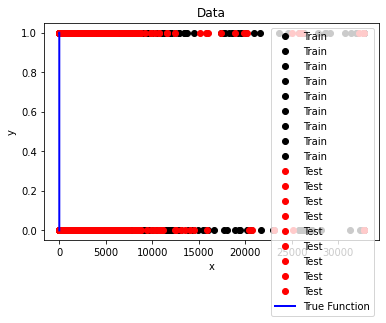

In [24]:
plt.plot(X_train, y_train, 'ko', label = 'Train'); 
plt.plot(X_test, y_test, 'ro', label = 'Test')
x_linspace = np.linspace(0, 1, 2398)
plt.plot(x_linspace, pred, 'b-', linewidth = 2, label = 'True Function')
plt.legend()
plt.xlabel('x'); plt.ylabel('y'); plt.title('Data');